# Electronic Band Structure with PDOS

## Import LIbraries

In [13]:
###### This program will plot the electronic band structure of the data derived from DFT #####
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, FixedLocator
from matplotlib import gridspec


## Input csv file

In [14]:
print("This Program will plot the electronic structure and PDOS from the data obtained from the DFT calculation,\n")
csv_file=input("Enter the name of the CSV file: ")
color1=input("Enter the hex color code for the Bands background ")
color2=input("Enter the hex color code for the PDOS background ")

### To import the CSV file for bands
bands= pd.read_csv(csv_file) ## Name of the CSV File
dos= pd.read_csv(csv_file)
DOS=dos.iloc[:,6:]
#print(bands)

This Program will plot the electronic structure and PDOS from the data obtained from the DFT calculation,

Enter the name of the CSV file: bto_dft.csv
Enter the hex color code for the Bands background #fff3d6
Enter the hex color code for the PDOS background #fff3d6


#### To Find Fermi Level

In [15]:
### To find Fermi Level
Ef=bands.Fermi[0]
#print(Ef,'eV')
New_E=dos.Edos-Ef

### BANDS & PDOS

#### To identify the Major ticks, Minor ticks and labels

In [16]:
####################################################################################################################
#                                              BANDS                                                               #
####################################################################################################################
### To find the last value in the Ticks Column
xmax=bands.Ticks.max()
#print(xmax)

### To find the index of the max value in the Ticks column
max_id=np.array(bands.Ticks).argmax()
#print("max",max_id)

### To load the Ticks and Tick Labels
ticks=bands.Ticks[:max_id]
label=bands.Label[:max_id]

### To find Minor Ticks 
##To find Minor ticks
mid = [ticks[i]+((ticks[i + 1] - ticks[i])/2) for i in range(len(ticks)-1)]
#print(mid)

#### To find Gamma POINT

In [17]:
##### To Find Gamma POINT by creating a dict like this {label:ticks}
# print(ticks)
# print(label)
T=[]
L=[]
for t in ticks:
    T.append(t)
for l in label:
    L.append(l)
# print(T)
# print(L)

HSP = {}
for key in L:
    for value in T:
        HSP[key] = value
        T.remove(value)
        break

### Gamma POINT
# print(HSP)
# print(HSP['Γ'])


#### To Plot the High Symmetry Point vs Energy data

Band Gap= 2.2488 eV


/tmp/ipykernel_3359/1001087099.py:195: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  neww.append(float(new['Edos']))


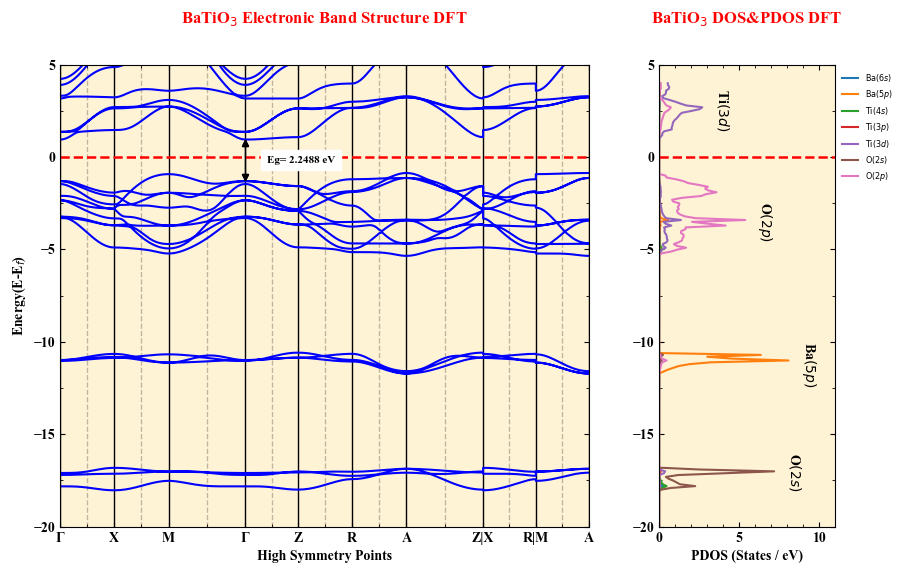

In [18]:

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])

### Plot the HSP vs E-Ef band Stucture
plt.plot(bands.HSP,bands.Energy-Ef,color='b') #where energy subtracted from the fermi level


### To Set the axis Limits
plt.xlim(0,xmax)
plt.ylim(-20,5) ### SET Y LIMIT


### To give Title
T1=bands.Title[0]
# print(T1)
T2=T1.split('-') #to remove character between strings
# print(T2)
Bands_Title=' '.join(T2) # to join the strings with space 
# print(Bands_Title)
plt.title(Bands_Title,fontdict={'fontname':'Times New Roman','fontsize':12,'fontweight':'bold','color':'r'},pad=30)
# plt.title(bands.Title[0],fontdict={'fontname':'Times New Roman','fontsize':15,'fontweight':'bold'})



### print(ticks)
plt.xticks(ticks,label,fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.yticks(fontname = "Times New Roman",fontsize=10, fontweight='bold')


###  Grid on
#plt.grid(axis='x', linewidth=1, color='black')
ax0.grid(which = "major", axis='x', linewidth=1, color='black') ## Major Grid on
ax0.grid(which = "minor", alpha = 0.25, axis='x',linewidth=0.7, color='black',linestyle='--') ## Minor Grid On for x axis


### Major and Minor ticks on
ax0.xaxis.set_major_locator(FixedLocator(ticks))
ax0.xaxis.set_minor_locator(FixedLocator(mid))
ax0.yaxis.set_minor_locator(AutoMinorLocator(2))



### To set the Ticks inward
ax0.tick_params(axis='both',direction='in',which='both',grid_linewidth=1.0)
plt.tick_params(bottom=True, top=True, left=True, right=True, which='both')

### Draw line at Fermi level
plt.axhline(0, color='r', linestyle='--',linewidth=1.8)


### To Set background color
ax0.set_facecolor(color1) # yellow color background


### Axis Labels
plt.xlabel('High Symmetry Points', fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.ylabel('Energy(E-E$_f$)',fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})


### To merge the bands coordinates as (x,y)
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list
 
BAND=merge(bands.HSP,bands.Energy-Ef) #(x,y)=(HSP,E)
#print(BAND)



### To find the BAND GAP
POS=[]
NEG=[]
for index, tup in enumerate(BAND):
#     print("x=",tup[0])
#     print("y=",tup[1])
    if tup[0]==HSP['Γ']:
        #print(tup[1])
        if tup[1]>0:
            POS.append(tup[1])
            y1=min(POS)
        if tup[1]<0:
            NEG.append(tup[1])
            y2=max(NEG)
Eg=y1-y2
x=HSP['Γ']
print("Band Gap=", round(Eg,4), "eV")



### Arrow annotation inside the plot

plt.plot((x,x),(y1-0.2,y2+0.2), 'black',linewidth=1) # arrow line
plt.plot((x,x),(y1-0.2,y1-0.2), 'black', marker='^',markersize=5) # lower arrowhead
plt.plot((x,x),(y2+0.2,y2+0.2), 'black', marker='v',markersize=5) # upper arrowhead


### To show Band gap value in the plot
BandGap="Eg= "+str(round(Eg,4))+" eV"
plt.text(x+0.2,y2+1,BandGap,fontdict={'fontname':'Times New Roman','fontsize':8,'fontweight':'bold'},backgroundcolor='#ffffff')



####################################################################################################################
#                                              PDOS                                                                 #
####################################################################################################################

ax1 = plt.subplot(gs[1])
#ax1.plot(y, x)
legend=[]
for n,atoms in enumerate(DOS, start=1):
    if (atoms!='Edos') & (atoms !='DOS') & (atoms[0:].endswith('$')):
        legend.append(str(atoms[0:]))
#         print(DOS[atoms])
        plt.plot(DOS[atoms],New_E)
#         plt.fill_between(dos.DOS,New_E, alpha=0.1,color='#000000')
        Xmax=dos.DOS.max()
        plt.ylim(-20,5)
        plt.xlim(0,round(Xmax+2))


####################################################################################################################
#                                     PDOS Fill and Background color  and Title                                    #
####################################################################################################################

### Background color
ax1.set_facecolor(color2) #Set Background color
# plt.fill(dos.DOS,New_E,alpha=0.1,color='#0f0f0f',label="DOS") ###fill color for DOS

### To give Title
T1=dos.Title[1]
# print(T1)
T2=T1.split('-')
# print(T2)
Dos_Title=' '.join(T2)
# print(Dos_Title)
plt.title(Dos_Title,fontdict={'fontname':'Times New Roman','fontsize':12,'fontweight':'bold','color':'r'},pad=30)
####################################################################################################################
#                                       Ticks,limit,label,title                                                    #
####################################################################################################################

### print(ticks)
plt.xticks(fontname='Times New Roman',fontsize=10,fontweight='bold')
#plt.xticks(plt.xticks()[0][1::2])
plt.yticks(fontname = "Times New Roman",fontsize=10, fontweight='bold')


### Minor ticks on
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))


### To set the Ticks inward
plt.tick_params(axis='both',direction='in',which='both',grid_linewidth=1.0)
plt.tick_params(bottom=True, top=True, left=True, right=True, which='both')

### Draw line at Fermi level
ax1.axhline(0, color='r', linestyle='--',linewidth=1.8)

### Axis Labels
#plt.ylabel('Energy (eV)', fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.xlabel('PDOS (States / eV)',fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})


### Legend
# legend.append(str('DOS'))
# print(legend)
ax1.legend(legend,loc=0,fontsize='xx-small',framealpha =0,bbox_to_anchor=(1,1)) ### legend for PDOS


####################################################################################################################
#                                      Annotation  data taking from PDOS data                                      #
####################################################################################################################

### to find the energy values of each orbital electrons contribution
max_int=[]
atom=[]
for n,atoms in enumerate(DOS, start=1):
    if (atoms!='Edos') & (atoms !='DOS') & (atoms[0:].endswith('$')):
        atom.append(atoms)
        max_int.append((DOS[atoms].max()))
#         print((DOS[atoms].max()))
# print(max_int)
# print(atom)

atom_max={}
for i in range(len(atom)):
    atom_max[atom[i]] = max_int[i]
# print('atoms with their max int =',atom_max)

neww=[]
for atm, m_int in atom_max.items():
#     print(atm, ":", m_int)
    new=DOS.loc[DOS[atm] == m_int]
    neww.append(float(new['Edos']))

    
x1=neww-Ef
x = x1.tolist() ## ENERGY (eV)
y=max_int       ##(Intensity)
# print('x value=',x)
# print(len(x))
# print('y value=',y)
# print(atom)

####################################################################################################################
#                                           Annotations for DOS                                                    #
####################################################################################################################

def plttext(x,y,atom):
    plt.text(x,y,atom,fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold','color':'#000000'},rotation=-90, rotation_mode='anchor')


for N in range(len(x)): 
    if ((x[N]>-20) & (x[N]<6) & (y[N]>1)): ### to remove the annotations beyond the plot axis limit
        plttext(y[N]+1,x[N]+1,atom[N])

        
        
### Save PLot
filename=dos.Title[2]
plt.savefig(filename+' Bands & Pdos'+'.png',dpi=1200)
#### to show figure
plt.show()
